In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
from tabulate import tabulate
plt.rcParams.update({'font.size': 15})
from otimo import SecaoAurea, Gradiente

# Método do Gradiente

## Como estimar o gradiente numericamente

In [2]:
# Calculo numérico das derivadas
def gradiente(x, fx, func, delta=1e-10):

    # Inicializa o vetor gradiente
    grad = np.zeros(x.size)
    
    # Para cada variável
    for n in range(x.size):
        
        # Vetor com 1 na posição da variável onde a derivada será calculada
        e = np.zeros(x.size)
        e[n] = 1
        
        # Estima a derivada no ponto
        grad[n] = (func(x + delta*e)-fx)/delta
        
        # Outras possibilidades de cálculo da derivada
        # grad[n] = (fx - func(x - delta*e))/delta # O(delta)
        # grad[n] = (func(x + delta*e) - func(x - delta*e))/(2*delta) # O(delta**2)
    
    return grad

# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]
    return 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Ponto de teste
x = np.array([4, -4], dtype=float)

# Calculo exato do gradiente
exato = np.array([4*x[0] + + 2*x[1] + 1,
                  2*x[1] + 2*x[0] - 2], dtype=float)

# Calculo estimado do gradiente
estimado = gradiente(x, func(x), func, delta=1e-2)

# Montando a tabela para imprimir os valores
dados = [['x1', exato[0], estimado[0]],
         ['x2', exato[1], estimado[1]]]

# Definição do cabeçalho da tabela
cabecalho = ["Variável", "Exato", "Aproximação"]

# Imprime a tabela
print(tabulate(dados, headers=cabecalho))

Variável      Exato    Aproximação
----------  -------  -------------
x1                9           9.02
x2               -2          -1.99


## Método do Gradiente

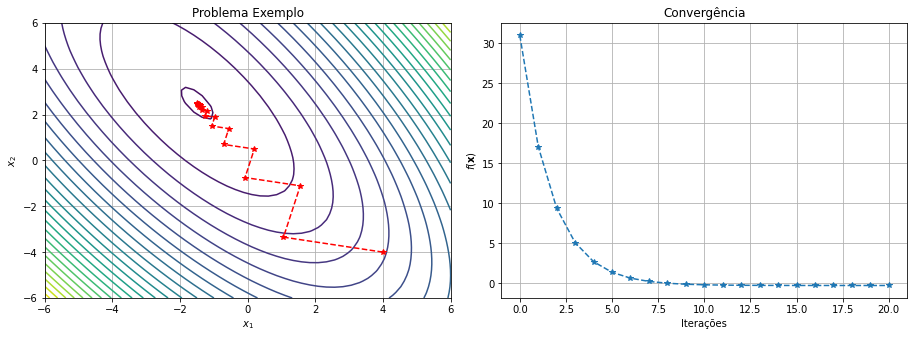

In [3]:
# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]
    return 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Parametros iniciais
x0 = np.array([4, -4], dtype=float) # Ponto inicial
maxit = 20 # Número de iterações

# Definição inicial das variáveis do processo iterativo
x = x0
fx = func(x0)
xhist = [np.copy(x0)]
fxhist = [fx]
    
# Critério de parada: número de iterações
for k in range(maxit):
        
    # Calcula gradiente
    grad = gradiente(x, fx, func, delta=1e-4)

    # Define a direção de busca
    d = -grad
        
    # A função que representará nossa otimização unidimensional
    def theta(alpha):
        fx = func(x + alpha*d)
        return fx

    # Otimização unidimensional para determinar o passo na direção d
    alpha, _ = SecaoAurea().resolva(theta)
        
    # Atualiza
    x = x + alpha*d
    fx = func(x)
        
    xhist.append(np.copy(x))
    fxhist.append(fx)

xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-6, 6),
                     np.linspace(-6, 6))

# Avalia função para plotar contorno
f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()

## Outras funções-objetivo

### Rosenbrock

\begin{equation}
    \mathbf{x^*} = \mathrm{arg}\min_{x} f(\mathbf{x}): 100(x_2-x_1^2)^2 + (1-x_1)^2 \\ - 1\le x_1, x_2 \le 1
\end{equation}

* A solução ótima do problema é $\mathbf{x^*} = (1, 1)$ para o qual $f(1, 1) = 0$.
* Código para colocar na `func`: `100*(x2-x1**2)**2 + (1-x1)**2`
* Ponto inicial sugerido: $\mathbf{x_0} = (-0.5, 0.5)$

Solução ótima: [0.87419133 0.76380388]
Número de iterações: 172
Número de avaliações: 5020


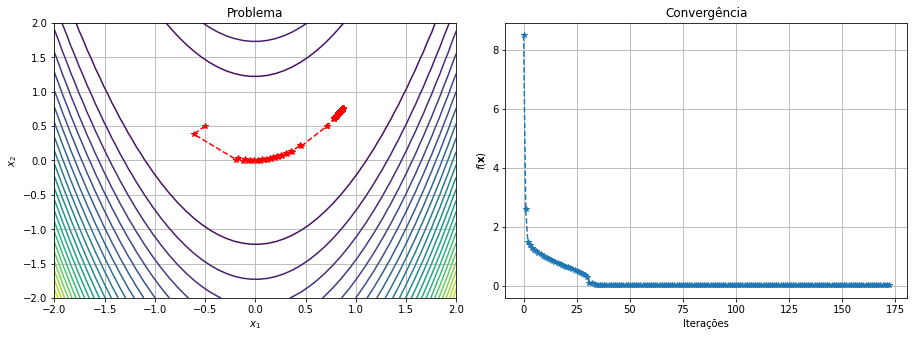

In [4]:
# Definição da função objetivo
def rosenbrock(x):
    x1, x2 = x[0], x[1]
    return 100*(x2-x1**2)**2 + (1-x1)**2

solucao = Gradiente(SecaoAurea(precisao=1e-4, passo=1e-5), maxit=200,
                    maxaval=5000).resolva(rosenbrock, np.array([-.5, .5]))

print(solucao)
solucao.resultados(rosenbrock, [-2, 2], [-2, 2])

### Ackley

$$ \mathbf{x^*} = \mathrm{arg}\min_{x} f(\mathbf{x}): -20e^{-0.2\sqrt{0.5(x_1^2+x_2^2)}} - e^{0.5(\cos(2\pi x_1) + \cos(2\pi x_2))} + e + 20 \\ - 2\le x_1, x_2 \le 2 $$ 

* A solução ótima do problema é $\mathbf{x^*} = (0, 0)$ para o qual $f(0, 0) = 0$.
* Código para colocar na `func`: `-20*np.exp(-0.2*np.sqrt(0.5*(x1**2+x2**2))) - np.exp(0.5*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))) + np.exp(1) + 20`
* Ponto inicial sugerido: $\mathbf{x_0} = (-0.4, 0.4)$

Solução ótima: [ 0.00576766 -0.0057666 ]
Número de iterações: 200
Número de avaliações: 1412


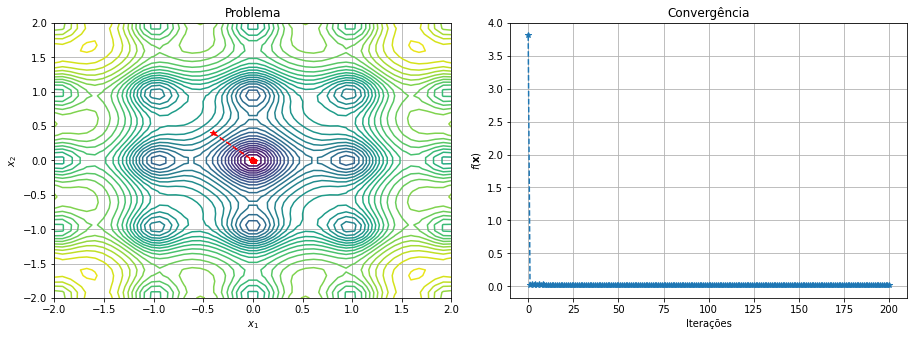

In [5]:
# Definição da função objetivo
def ackley(x):
    x1, x2 = x[0], x[1]
    return (-20*np.exp(-0.2*np.sqrt(0.5*(x1**2+x2**2)))
            - np.exp(0.5*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2)))
            + np.exp(1) + 20)

solucao = Gradiente(SecaoAurea(precisao=1e-2), maxit=200,
                    maxaval=5000).resolva(ackley, np.array([-0.4, 0.4]))

print(solucao)
solucao.resultados(ackley, [-2, 2], [-2, 2])

### Beale

\begin{equation}
\end{equation}

$$ \mathbf{x^*} = \mathrm{arg}\min_{x} f(\mathbf{x}): (1.5 - x_1 + x_1x_2)^2 + (2.25-x_1+x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2 \\ - 4.5\le x_1, x_2 \le 4.5 $$ 

* A solução ótima do problema é $\mathbf{x^*} = (3, 0.5)$ para o qual $f(3, 0.5) = 0$.
* Código para colocar na `func`: `(1.5 - x1 + x1*x2)**2 + (2.25-x1+x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2`
* Ponto inicial sugerido: $\mathbf{x_0} = (2, 2)$

Solução ótima: [2.99602532 0.49901897]
Número de iterações: 169
Número de avaliações: 5011


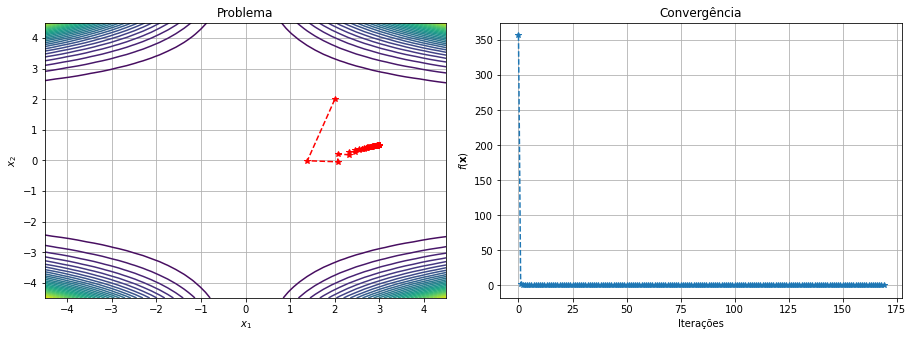

In [6]:
# Definição da função objetivo
def beale(x):
    x1, x2 = x[0], x[1]
    return ((1.5 - x1 + x1*x2)**2 + (2.25-x1+x1*x2**2)**2
            + (2.625 - x1 + x1*x2**3)**2) 

solucao = Gradiente(SecaoAurea(precisao=1e-3, passo=1e-4), maxit=200,
                    maxaval=5000).resolva(beale, np.array([2., 2.]))

print(solucao)
solucao.resultados(beale, [-4.5, 4.5], [-4.5, 4.5])